In [72]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
import json

# Import API key
from Config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [73]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

## Perform API Calls

In [74]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
response_json = requests.get(query_url + "London").json()
print(json.dumps(response_json, indent=4, sort_keys=True))
response_json['name']
rtime = datetime.datetime.fromtimestamp(response_json['dt']).strftime('%m-%d-%Y')

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 51.51,
        "lon": -0.13
    },
    "dt": 1530042600,
    "id": 2643743,
    "main": {
        "humidity": 59,
        "pressure": 1026,
        "temp": 20.01,
        "temp_max": 23,
        "temp_min": 16
    },
    "name": "London",
    "sys": {
        "country": "GB",
        "id": 5091,
        "message": 0.0072,
        "sunrise": 1529984706,
        "sunset": 1530044508,
        "type": 1
    },
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 100,
        "speed": 6.2
    }
}


In [75]:
lat = []
temp = []
name = []
country = []
humidity = []
wind = []
cloud = []

# Loop through the list of cities and perform a request for data on each
for city2 in cities:
    response = requests.get(query_url + city2, False).json()
    try:
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        cloud.append(response['clouds']['all'])
        name.append(response['name'])
        country.append(response['sys']['country'])
    except KeyError:
        continue
    
    


In [76]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": name,
    "country": country,
    "lat": lat,
    "temp": temp,
    "clouds": cloud,
    "wind": wind,
    "humidity": humidity
   
}
weather_data = pd.DataFrame(weather_dict)
weather_data['temp'] = (9 * weather_data['temp'] + (32 * 5))/5
weather_data.head()

,city,clouds,country,humidity,lat,temp,wind
0,Nanortalik,0,GL,98,60.14,36.788,7.07
1,Punta Arenas,0,CL,86,-53.16,39.200,5.70
2,Atuona,48,PF,99,-9.80,80.528,8.82
3,Rikitea,88,PF,100,-23.12,73.508,8.07
4,Khatanga,64,RU,95,71.98,56.768,8.32


C:\Users\Owner\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\collections.py:853: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


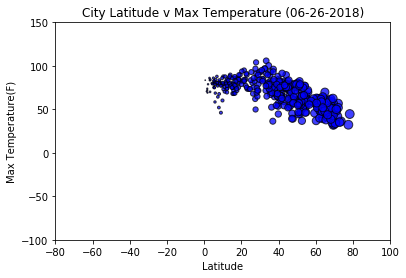

In [78]:
plt.figure(0)
plt.xlim(-80,100)
plt.ylim(-100,150)
plt.title("City Latitude v Max Temperature (" + rtime + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")

plt.scatter(weather_data['lat'], weather_data['temp'], marker="o", facecolors="blue", edgecolors="black",
            s=weather_data['lat'], alpha=0.75)
plt.savefig("Lat_Temp.png")

C:\Users\Owner\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\collections.py:853: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


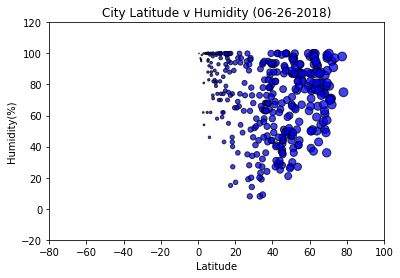

In [79]:
plt.figure(1)
plt.xlim(-80,100)
plt.ylim(-20,120)
plt.title("City Latitude v Humidity (" + rtime + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

plt.scatter(weather_data['lat'], weather_data['humidity'], marker="o", facecolors="blue", edgecolors="black",
            s=weather_data['lat'], alpha=0.75)
plt.savefig("Lat_Humidity.png")

C:\Users\Owner\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\collections.py:853: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


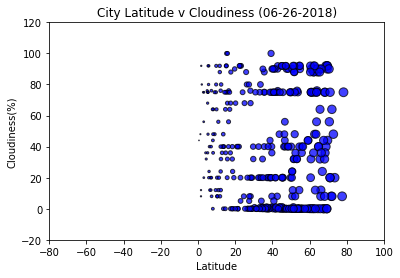

In [80]:
plt.figure(2)
plt.xlim(-80,100)
plt.ylim(-20,120)
plt.title("City Latitude v Cloudiness (" + rtime + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

plt.scatter(weather_data['lat'], weather_data['clouds'], marker="o", facecolors="blue", edgecolors="black",
            s=weather_data['lat'], alpha=0.75)
plt.savefig("Lat_Cloud.png")

C:\Users\Owner\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\collections.py:853: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


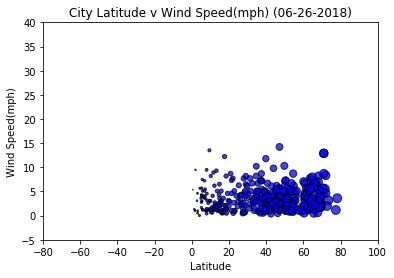

In [81]:
plt.figure(3)
plt.xlim(-80,100)
plt.ylim(-5,40)
plt.title("City Latitude v Wind Speed(mph) (" + rtime + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.grid
plt.scatter(weather_data['lat'], weather_data['wind'], marker="o", facecolors="blue", edgecolors="black",
            s=weather_data['lat'], alpha=0.75)
plt.savefig("Lat_Wind.png")

In [82]:
plt.show()

In [83]:
weather_data.to_csv('weather.csv', sep='')